In [48]:
# Import Important Libraries
import sklearn
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

import pandas as pd
import numpy as np
# import math
import math

import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data set.

Before we start with the actual training process or preprocessing, we will need to get the relevant data points which we filtered out constant and quasi-constant features. Then these data points are translated into numbers using the consistent method. For our target, 0 shall represent edible where 1 shall represent poisonous. 

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/cynthiacheng1/ShroomAnalysis/main/mushrooms.csv")

In [50]:
#Load the data / Preprocessing

#Features
data = df.drop("class",axis=1)
filters = ["gill-attachment","veil-type","veil-color","ring-number"] #features to be excluded, found through constant and quasi-constant filtering
data = data.drop(columns=filters)
print(data.head)

def to_digit(i):
    if i in chars:
        return chars[i]
    else:
        chars[i] = len(chars)+1
        return chars[i]

features = list(data.columns)
for idx in features:
    chars = {}
    data[idx] = data[idx].map(to_digit)

print(data.head)

#Target
target = df["class"]
target = target.replace("e",0)
target = target.replace("p",1)
print (target.head)


#print('Q01 - cancer.data.shape: ', cancer.data.shape)


<bound method NDFrame.head of      cap-shape cap-surface cap-color  ... spore-print-color population habitat
0            x           s         n  ...                 k          s       u
1            x           s         y  ...                 n          n       g
2            b           s         w  ...                 n          n       m
3            x           y         w  ...                 k          s       u
4            x           s         g  ...                 n          a       g
...        ...         ...       ...  ...               ...        ...     ...
8119         k           s         n  ...                 b          c       l
8120         x           s         n  ...                 b          v       l
8121         f           s         n  ...                 b          c       l
8122         k           y         n  ...                 w          v       l
8123         x           s         n  ...                 o          c       l

[8124 rows x 18 colum

# Data Pre-Processing
Scale before splitting the data into train and test since we will be using gradient ascent. 
* Use `preprocessing` to scale the data. 
* Assign the target of cancer to variable `y (<np.ndarray>)`.
* Use `train_test_split` to split the data (`75% train` and `25% test`) to `X_train`, `X_test`, `y_train`, `y_test` with `random_state` of 42
* Reshape `y_train` into 2D array `y_2d_train` and `y_test` into 2D array `y_2d_test`

In [51]:

X= data.to_numpy()
y = target.to_numpy()

#75% train, 25%test
X_train, X_test, y_train, y_test = train_test_split(X, y)

#scaling x 
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


y_2d_train = y_train.reshape(y_train.shape[0],1)
y_2d_test = y_test.reshape(y_test.shape[0],1)

print('X_train.shape: ', X_train.shape)
print('y_2d_train.shape: ', y_2d_train.shape)

print('X_test.shape: ', X_test.shape)



X_train.shape:  (6093, 18)
y_2d_train.shape:  (6093, 1)
X_test.shape:  (2031, 18)


# Model Fitting With L1 Penalty, Using Kfolds with k = 10 to find ideal C

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
The minimum test error rate =   0.0000e+00, SE=  0.0000e+00
The C value corresponding to minimum error =   3.3598e+00


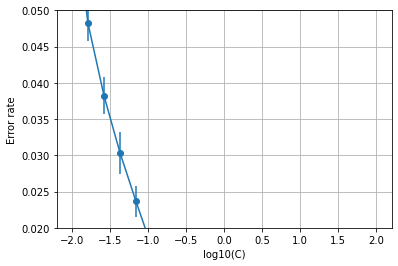

In [52]:
#KFold with K = 10
npen = 20
C_test = np.logspace(-2,2,npen)

# Create the cross-validation object and error rate matrix
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
err_rate = np.zeros((npen,nfold))
num_nonzerocoef = np.zeros((npen,nfold))

#Set Up Logreg
logreg =  LogisticRegression(penalty="l1",solver="liblinear", warm_start=True)

# Loop over the folds in the cross-validation

X_train_unscaled = scaler.inverse_transform(X_train)
for ifold, Ind in enumerate(kf.split(X_train_unscaled)):        
            
    # Get training and test data
    Itr, Its = Ind
    Xtr = X_train[Itr,:]
    ytr = y_train[Itr]
    Xts = X_train[Its,:]
    yts = y_train[Its]
    
    scaler_KFold = preprocessing.StandardScaler()
    Xtr= scaler_KFold.fit_transform(Xtr)
    Xts = scaler_KFold.transform(Xts)
    
    # Loop over penalty levels
    for ipen, c in enumerate(C_test):
        
        # Set the penalty level        
        logreg.C= c
    
        # Fit a model on the training data
        logreg.fit(Xtr, ytr)
    
        # Predict the labels on the test set.
        yhat = logreg.predict(Xts)
        
        # Measure the accuracy
        err_rate[ipen,ifold] = np.mean(yhat != yts)
        #num_nonzerocoef[ipen,ifold]=np.sum(abs(logreg.coef_)>0.001)

    print("Fold %d" % ifold)

err_mean = np.mean(err_rate, axis=1)
#num_nonzerocoef_mean = np.mean(num_nonzerocoef, axis=1)
err_se = np.std(err_rate,axis=1)/np.sqrt(nfold-1)
plt.errorbar(np.log10(C_test), err_mean, marker='o',yerr=err_se)
plt.ylim([0.02,0.05])
plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('Error rate')

imin = np.argmin(err_mean)

print("The minimum test error rate = %12.4e, SE=%12.4e" % (err_mean[imin], err_se[imin]))
print("The C value corresponding to minimum error = %12.4e" % (C_test[imin]))

In [68]:

logreg =  LogisticRegression(penalty="l1",solver="liblinear",C=5.4556e+00)
# Fit the model
# Don't use matrix X_train_1. Instead, use x_train.
logreg.fit(X_train,y_train)

# Find the predicted values on training set using logreg.predict
y_hat_logreg = logreg.predict(X_train)
# Find the accuracy achieved on training set using logreg.score and y_train as type of int
acc_logreg = logreg.score(X_train,y_train) 

# Find Precision, recall and fscore using precision_recall_fscore_support nethod of sklearn
temp = precision_recall_fscore_support(y_train,y_hat_logreg)
prec = temp[0]
recal = temp[1]
fscore = temp[2]

print('Training Precision: ', prec)
print('Training Recall: ', recal)
print('Training F_score: ', fscore)
print('Training Accuracy: ', acc_logreg)

y_hat_logreg_test = logreg.predict(X_test)
acc_logreg_test = logreg.score(X_test,y_test)
temp2 = precision_recall_fscore_support(y_test,y_hat_logreg_test)
prec2 = temp[0]
recal2 = temp[1]
fscore2 = temp[2]
print('Testing Precision: ', prec2)
print('Testing Recall: ', recal2)
print('Testing F_score: ', fscore2)
print('Testing Accuracy: ', acc_logreg_test)

print('Model Weights:', np.hstack((logreg.intercept_[:,None], logreg.coef_)))


Training Precision:  [1. 1.]
Training Recall:  [1. 1.]
Training F_score:  [1. 1.]
Training Accuracy:  1.0
Testing Precision:  [1. 1.]
Testing Recall:  [1. 1.]
Testing F_score:  [1. 1.]
Testing Accuracy:  1.0
Model Weights: [[ -2.28441098   0.          -0.39348745  -0.15899318 -47.59720834
   46.09387518 -17.3523325  -42.75064864   0.5881197   -7.91966687
   -0.99258409  21.83500114  14.08561539   1.30197728   0.06887537
   -1.82031383   1.94455322  -2.83187772  -2.23867272]]


# Model Fitting With L2 Penalty, Using Kfolds with k=10 to find ideal C

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold 7


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold 8
Fold 9
The minimum test error rate =   0.0000e+00, SE=  0.0000e+00
The C value corresponding to minimum error =   6.1585e+01


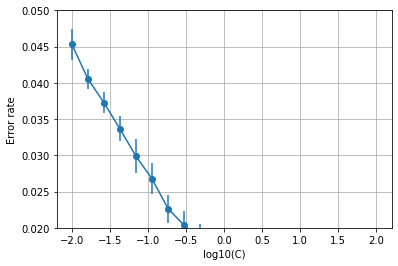

In [54]:

# Create the cross-validation object and error rate matrix
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
err_rate = np.zeros((npen,nfold))
num_nonzerocoef = np.zeros((npen,nfold))

#Set Up Logreg
logreg =  LogisticRegression(penalty="l2", warm_start=True)

# Loop over the folds in the cross-validation

X_train_unscaled = scaler.inverse_transform(X_train)
for ifold, Ind in enumerate(kf.split(X_train_unscaled)):        
            
    # Get training and test data
    Itr, Its = Ind
    Xtr = X_train[Itr,:]
    ytr = y_train[Itr]
    Xts = X_train[Its,:]
    yts = y_train[Its]
    
    scaler_KFold = preprocessing.StandardScaler()
    Xtr= scaler_KFold.fit_transform(Xtr)
    Xts = scaler_KFold.transform(Xts)
    
    # Loop over penalty levels
    for ipen, c in enumerate(C_test):
        
        # Set the penalty level        
        logreg.C= c
    
        # Fit a model on the training data
        logreg.fit(Xtr, ytr)
    
        # Predict the labels on the test set.
        yhat = logreg.predict(Xts)
        
        # Measure the accuracy
        err_rate[ipen,ifold] = np.mean(yhat != yts)
        #num_nonzerocoef[ipen,ifold]=np.sum(abs(logreg.coef_)>0.001)

    print("Fold %d" % ifold)

err_mean = np.mean(err_rate, axis=1)
#num_nonzerocoef_mean = np.mean(num_nonzerocoef, axis=1)
err_se = np.std(err_rate,axis=1)/np.sqrt(nfold-1)
plt.errorbar(np.log10(C_test), err_mean, marker='o',yerr=err_se)
plt.ylim([0.02,0.05])
plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('Error rate')

imin = np.argmin(err_mean)

print("The minimum test error rate = %12.4e, SE=%12.4e" % (err_mean[imin], err_se[imin]))
print("The C value corresponding to minimum error = %12.4e" % (C_test[imin]))

In [71]:
logreg =  LogisticRegression(penalty="l2",solver="liblinear",C=6.1585e+01)
# Fit the model
# Don't use matrix X_train_1. Instead, use x_train.
logreg.fit(X_train,y_train)

# Find the predicted values on training set using logreg.predict
y_hat_logreg = logreg.predict(X_train)
# Find the accuracy achieved on training set using logreg.score and y_train as type of int
acc_logreg = logreg.score(X_train,y_train) 

# Find Precision, recall and fscore using precision_recall_fscore_support nethod of sklearn
temp = precision_recall_fscore_support(y_train,y_hat_logreg)
prec = temp[0]
recal = temp[1]
fscore = temp[2]

print('Training Precision: ', prec)
print('Training Recall: ', recal)
print('Training F_score: ', fscore)
print('Training Accuracy: ', acc_logreg)

y_hat_logreg_test = logreg.predict(X_test)
acc_logreg_test = logreg.score(X_test,y_test)
temp2 = precision_recall_fscore_support(y_test,y_hat_logreg_test)
prec2 = temp[0]
recal2 = temp[1]
fscore2 = temp[2]
print('Testing Precision: ', prec2)
print('Testing Recall: ', recal2)
print('Testing F_score: ', fscore2)
print('Testing Accuracy: ', acc_logreg_test)

print('Model Weights:', np.hstack((logreg.intercept_[:,None], logreg.coef_)))

Training Precision:  [1. 1.]
Training Recall:  [1. 1.]
Training F_score:  [1. 1.]
Training Accuracy:  1.0
Testing Precision:  [1. 1.]
Testing Recall:  [1. 1.]
Testing F_score:  [1. 1.]
Testing Accuracy:  1.0
Model Weights: [[-2.47719612e+00 -2.09007740e-02 -4.95351538e-01 -1.55816258e-01
  -3.63880540e+01  3.53188865e+01 -1.29487189e+01 -3.36627090e+01
   7.35156143e-01 -6.70141740e+00 -1.88607784e+00  1.57527186e+01
   1.24361921e+01  1.42348090e+00  1.46136376e-01 -1.61472964e+00
   2.66717386e+00 -2.77181082e+00 -1.23746810e+00]]


# L1 and L2 with varying C for demonstration purposes.

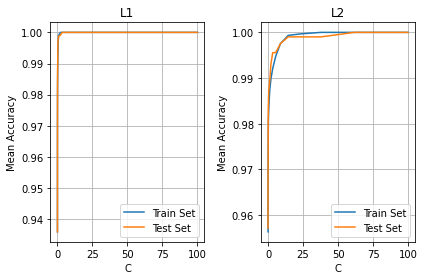

In [61]:


def do_logreg(penalty, C):
    logreg = LogisticRegression(penalty=penalty,C=C,solver="liblinear")
    logreg.fit(X_train,y_train)

    logreg_tr_acc = logreg.score(X_train,y_train)
    logreg_te_acc = logreg.score(X_test,y_test)
    return (logreg_tr_acc,logreg_te_acc)

C_list = np.logspace(-2,2,20)

l1_train_result = []
l1_test_result = []
l2_train_result = []
l2_test_result = []

for C in C_list:
    l1_results = do_logreg("l1",C)
    l2_results = do_logreg("l2",C)
    l1_train_result.append(l1_results[0])
    l1_test_result.append(l1_results[1])
    l2_train_result.append(l2_results[0])
    l2_test_result.append(l2_results[1])

plt.subplot(1,2,1)
plt.plot(C_list,l1_train_result)
plt.plot(C_list,l1_test_result)
plt.xlabel("C")
plt.ylabel("Mean Accuracy")
plt.legend(["Train Set","Test Set"])
plt.title("L1")
plt.grid()

plt.subplot(1,2,2)
plt.plot(C_list,l2_train_result)
plt.plot(C_list,l2_test_result)
plt.xlabel("C")
plt.ylabel("Mean Accuracy")
plt.legend(["Train Set","Test Set"])
plt.title("L2")
plt.grid()

plt.tight_layout()
plt.show()





In [64]:
print(C_list)
print(l2_train_result)
print(l2_test_result)

[1.00000000e-02 1.62377674e-02 2.63665090e-02 4.28133240e-02
 6.95192796e-02 1.12883789e-01 1.83298071e-01 2.97635144e-01
 4.83293024e-01 7.84759970e-01 1.27427499e+00 2.06913808e+00
 3.35981829e+00 5.45559478e+00 8.85866790e+00 1.43844989e+01
 2.33572147e+01 3.79269019e+01 6.15848211e+01 1.00000000e+02]
[0.9563433448219268, 0.9609387822090923, 0.9642212374856393, 0.9683243065813228, 0.971770884621697, 0.9750533398982438, 0.9786640407024454, 0.9811258821598555, 0.9829312325619564, 0.9850648284917118, 0.987526669949122, 0.9898243886427047, 0.9921221073362876, 0.994748071557525, 0.9975381585425899, 0.9993435089446906, 0.9996717544723454, 1.0, 1.0, 1.0]
[0.9571639586410635, 0.96602658788774, 0.9694731659281143, 0.9734121122599705, 0.9739044805514525, 0.9807976366322009, 0.983751846381093, 0.9847365829640571, 0.9871984244214672, 0.9881831610044313, 0.9896602658788775, 0.9931068439192516, 0.9955686853766618, 0.9955686853766618, 0.9975381585425899, 0.999015263417036, 0.999015263417036, 0.999

# Even though we know linear works, let's try polynomial transformation just to see how it will fare, we will use l2 regularisation with k-folds to determine optimal perimeter.

In [57]:
#Transformation first 
poly = preprocessing.PolynomialFeatures(2)
Z = poly.fit_transform(X) 

#75% train, 25%test
Z_train, Z_test, y2_train, y2_test = train_test_split(Z, y)

#scaling Z AFTER TRANSFORMATION
scaler_z = preprocessing.StandardScaler()
Z_train= scaler_z.fit_transform(Z_train)
Z_test = scaler_z.transform(Z_test)

print(Z_train.shape) #we have 190 features, but since we got 8124 data points, we will not use dual formulation

(6093, 190)


Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
The minimum test error rate =   0.0000e+00, SE=  0.0000e+00
The C value corresponding to minimum error =   1.8330e-01


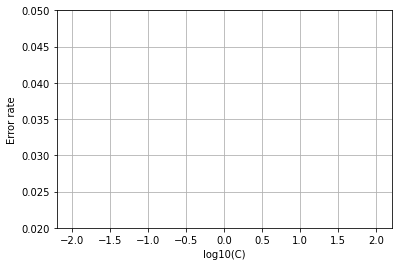

In [58]:
#Get ideal C first
npen = 20
C_test = np.logspace(-2,2,npen)

# Create the cross-validation object and error rate matrix
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)
err_rate = np.zeros((npen,nfold))
num_nonzerocoef = np.zeros((npen,nfold))

#Set Up Logreg
logreg =  LogisticRegression(penalty="l2", warm_start=True)

# Loop over the folds in the cross-validation

Z_train_unscaled = scaler_z.inverse_transform(Z_train)
for ifold, Ind in enumerate(kf.split(Z_train_unscaled)):        
            
    # Get training and test data
    Itr, Its = Ind
    Ztr = Z_train[Itr,:]
    ytr = y2_train[Itr]
    Zts = Z_train[Its,:]
    yts = y2_train[Its]
    
    scaler_KFold = preprocessing.StandardScaler()
    Ztr = scaler_KFold.fit_transform(Ztr)
    Zts = scaler_KFold.transform(Zts)
    
    # Loop over penalty levels
    for ipen, c in enumerate(C_test):
        
        # Set the penalty level        
        logreg.C= c
    
        # Fit a model on the training data
        logreg.fit(Ztr, ytr)
    
        # Predict the labels on the test set.
        yhat = logreg.predict(Zts)
        
        # Measure the accuracy
        err_rate[ipen,ifold] = np.mean(yhat != yts)
        #num_nonzerocoef[ipen,ifold]=np.sum(abs(logreg.coef_)>0.001)

    print("Fold %d" % ifold)

err_mean = np.mean(err_rate, axis=1)
#num_nonzerocoef_mean = np.mean(num_nonzerocoef, axis=1)
err_se = np.std(err_rate,axis=1)/np.sqrt(nfold-1)
plt.errorbar(np.log10(C_test), err_mean, marker='o',yerr=err_se)
plt.ylim([0.02,0.05])
plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('Error rate')

imin = np.argmin(err_mean)

print("The minimum test error rate = %12.4e, SE=%12.4e" % (err_mean[imin], err_se[imin]))
print("The C value corresponding to minimum error = %12.4e" % (C_test[imin]))

In [72]:
logreg =  LogisticRegression(penalty="l2",C=1.8330e-01,solver="liblinear")
# Fit the model
# Don't use matrix X_train_1. Instead, use x_train.
logreg.fit(Z_train,y2_train)

# Find the predicted values on training set using logreg.predict
y_hat_logreg = logreg.predict(Z_train)
# Find the accuracy achieved on training set using logreg.score and y_train as type of int
acc_logreg = logreg.score(Z_train,y2_train) 

# Find Precision, recall and fscore using precision_recall_fscore_support nethod of sklearn
temp = precision_recall_fscore_support(y2_train,y_hat_logreg)
prec = temp[0]
recal = temp[1]
fscore = temp[2]

print('Training Precision: ', prec)
print('Training Recall: ', recal)
print('Training F_score: ', fscore)
print('Training Accuracy: ', acc_logreg)

y_hat_logreg_test = logreg.predict(Z_test)
acc_logreg_test = logreg.score(Z_test,y2_test)
temp2 = precision_recall_fscore_support(y2_test,y_hat_logreg_test)
prec2 = temp[0]
recal2 = temp[1]
fscore2 = temp[2]
print('Testing Precision: ', prec2)
print('Testing Recall: ', recal2)
print('Testing F_score: ', fscore2)
print('Testing Accuracy: ', acc_logreg_test)

print('Model Weights:', np.hstack((logreg.intercept_[:,None], logreg.coef_)))

Training Precision:  [1. 1.]
Training Recall:  [1. 1.]
Training F_score:  [1. 1.]
Training Accuracy:  1.0
Testing Precision:  [1. 1.]
Testing Recall:  [1. 1.]
Testing F_score:  [1. 1.]
Testing Accuracy:  1.0
Model Weights: [[ 0.3820288   0.          0.19954465 -0.34096152  0.08726034 -0.82540859
   0.02660686 -0.17686752 -1.25573644  0.1458177  -0.05391502 -0.3556705
   0.17917324  0.16972829  0.0506991  -0.07017122 -0.01880242  0.22609512
   0.08431288 -0.20901282  0.32949374 -0.24658895 -0.03298286 -0.53950671
  -0.27024075 -0.31384699 -0.04947627  0.17638763  0.16451579 -0.15526786
   0.10223275  0.15194295  0.02325268 -0.03219882  0.17183734  0.406354
  -0.01659652 -0.13521905 -0.50145241 -0.02493941 -0.9397198   0.04469912
   0.26328066 -0.36624742  0.04112113 -0.49285572  0.30457643  0.44225841
   0.4311062   0.32807368  0.15823714  0.08001849  0.20787446 -0.38692558
   0.97045063 -0.42485535 -0.12665904  0.69083349  0.28348947 -0.06882868
  -0.02390402  0.18542757 -0.0046694   0

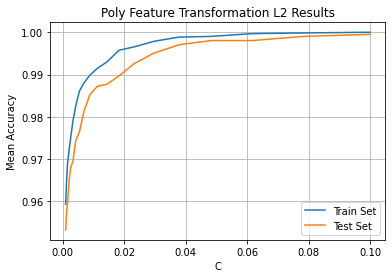

In [66]:
def do_poly_logreg(penalty, C):
    logreg = LogisticRegression(penalty=penalty,C=C,solver="liblinear")
    logreg.fit(Z_train,y2_train)

    logreg_tr_acc = logreg.score(Z_train,y2_train)
    logreg_te_acc = logreg.score(Z_test,y2_test)
    return (logreg_tr_acc,logreg_te_acc)

poly_train_result = []
poly_test_result = []

C_list = np.logspace(-3,-1,20)
for C in C_list:
    poly_results = do_poly_logreg("l2",C)
    poly_train_result.append(poly_results[0])
    poly_test_result.append(poly_results[1])


plt.plot(C_list,poly_train_result)
plt.plot(C_list,poly_test_result)
plt.xlabel("C")
plt.ylabel("Mean Accuracy")
plt.legend(["Train Set","Test Set"])
plt.title("Poly Feature Transformation L2 Results")
plt.grid()

In [67]:
print(C_list)
print(poly_train_result)
print(poly_test_result)

[0.001      0.00127427 0.00162378 0.00206914 0.00263665 0.00335982
 0.00428133 0.00545559 0.00695193 0.00885867 0.01128838 0.0143845
 0.01832981 0.02335721 0.02976351 0.0379269  0.0483293  0.06158482
 0.078476   0.1       ]
[0.959297554570819, 0.9645494830132939, 0.9689807976366323, 0.9719350073855244, 0.9750533398982438, 0.9789922862301002, 0.9826029870343017, 0.9860495650746759, 0.988019038240604, 0.9898243886427047, 0.9914656162809782, 0.9929427211554243, 0.995732808140489, 0.9965534219596258, 0.9978664040702445, 0.9988511406532086, 0.999015263417036, 0.9996717544723454, 0.9998358772361726, 1.0]
[0.9532250123092073, 0.9571639586410635, 0.9596258000984736, 0.9645494830132939, 0.9679960610536681, 0.9694731659281143, 0.9743968488429345, 0.9763663220088626, 0.9812900049236829, 0.9852289512555391, 0.9871984244214672, 0.9876907927129492, 0.9896602658788775, 0.9926144756277696, 0.9950763170851797, 0.9970457902511078, 0.9980305268340719, 0.9980305268340719, 0.999015263417036, 0.999507631708